## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.123293  0.683414 -0.943370  0.279252 -1.228577  0.679341
1 -1.791279  0.229326  1.613555  0.214001  0.834724 -0.108406
2  1.595942  0.033939 -1.715600  0.042124 -1.170287  1.389309
3  0.833007  0.016532 -1.083263 -1.678507 -1.379516 -0.558724
4 -1.740626  0.903561  0.411019  1.675463 -0.781667 -0.517006


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9924267	total: 56.3ms	remaining: 56.3s
1:	learn: 0.9838534	total: 56.9ms	remaining: 28.4s
2:	learn: 0.9750124	total: 57.3ms	remaining: 19.1s
3:	learn: 0.9630944	total: 57.7ms	remaining: 14.4s
4:	learn: 0.9531922	total: 58.3ms	remaining: 11.6s
5:	learn: 0.9443209	total: 58.8ms	remaining: 9.74s
6:	learn: 0.9341407	total: 59.4ms	remaining: 8.42s
7:	learn: 0.9255877	total: 59.8ms	remaining: 7.41s
8:	learn: 0.9162249	total: 60.4ms	remaining: 6.66s
9:	learn: 0.9058995	total: 61ms	remaining: 6.04s
10:	learn: 0.8969431	total: 61.6ms	remaining: 5.54s
11:	learn: 0.8874886	total: 62.2ms	remaining: 5.12s
12:	learn: 0.8783967	total: 62.8ms	remaining: 4.77s
13:	learn: 0.8684688	total: 63.2ms	remaining: 4.45s
14:	learn: 0.8599746	total: 63.6ms	remaining: 4.18s
15:	learn: 0.8502860	total: 64.3ms	remaining: 3.95s
16:	learn: 0.8426945	total: 64.8ms	remaining: 3.75s
17:	learn: 0.8346760	total: 65.2ms	remaining: 3.56s
18:	learn: 0.8263978	total: 65.8ms	remaining: 

63:	learn: 0.5584544	total: 90ms	remaining: 1.31s
64:	learn: 0.5536962	total: 90.7ms	remaining: 1.3s
65:	learn: 0.5492693	total: 91.2ms	remaining: 1.29s
66:	learn: 0.5444996	total: 91.8ms	remaining: 1.28s
67:	learn: 0.5400245	total: 92.3ms	remaining: 1.26s
68:	learn: 0.5358409	total: 92.7ms	remaining: 1.25s
69:	learn: 0.5321293	total: 93.1ms	remaining: 1.24s
70:	learn: 0.5278438	total: 93.8ms	remaining: 1.23s
71:	learn: 0.5239114	total: 94.5ms	remaining: 1.22s
72:	learn: 0.5189586	total: 95ms	remaining: 1.21s
73:	learn: 0.5148388	total: 95.5ms	remaining: 1.2s
74:	learn: 0.5101800	total: 96.2ms	remaining: 1.19s
75:	learn: 0.5061817	total: 96.8ms	remaining: 1.18s
76:	learn: 0.5028286	total: 97.2ms	remaining: 1.17s
77:	learn: 0.4990474	total: 97.7ms	remaining: 1.15s
78:	learn: 0.4951774	total: 98.2ms	remaining: 1.15s
79:	learn: 0.4914694	total: 98.7ms	remaining: 1.13s
80:	learn: 0.4872907	total: 99.1ms	remaining: 1.12s
81:	learn: 0.4841071	total: 99.6ms	remaining: 1.11s
82:	learn: 0.48012

245:	learn: 0.1601506	total: 184ms	remaining: 564ms
246:	learn: 0.1591749	total: 185ms	remaining: 564ms
247:	learn: 0.1582556	total: 186ms	remaining: 563ms
248:	learn: 0.1572967	total: 186ms	remaining: 562ms
249:	learn: 0.1561810	total: 187ms	remaining: 560ms
250:	learn: 0.1550818	total: 187ms	remaining: 559ms
251:	learn: 0.1541359	total: 188ms	remaining: 558ms
252:	learn: 0.1532512	total: 188ms	remaining: 556ms
253:	learn: 0.1522291	total: 189ms	remaining: 555ms
254:	learn: 0.1511618	total: 189ms	remaining: 553ms
255:	learn: 0.1503816	total: 190ms	remaining: 552ms
256:	learn: 0.1494416	total: 190ms	remaining: 550ms
257:	learn: 0.1483234	total: 191ms	remaining: 549ms
258:	learn: 0.1472448	total: 191ms	remaining: 548ms
259:	learn: 0.1461995	total: 192ms	remaining: 546ms
260:	learn: 0.1451983	total: 192ms	remaining: 544ms
261:	learn: 0.1443560	total: 193ms	remaining: 543ms
262:	learn: 0.1433483	total: 193ms	remaining: 541ms
263:	learn: 0.1424179	total: 194ms	remaining: 540ms
264:	learn: 

401:	learn: 0.0660578	total: 271ms	remaining: 403ms
402:	learn: 0.0655772	total: 272ms	remaining: 403ms
403:	learn: 0.0652608	total: 272ms	remaining: 402ms
404:	learn: 0.0649511	total: 273ms	remaining: 401ms
405:	learn: 0.0646371	total: 273ms	remaining: 400ms
406:	learn: 0.0643288	total: 274ms	remaining: 399ms
407:	learn: 0.0640035	total: 275ms	remaining: 398ms
408:	learn: 0.0634748	total: 275ms	remaining: 398ms
409:	learn: 0.0631427	total: 276ms	remaining: 397ms
410:	learn: 0.0628489	total: 277ms	remaining: 396ms
411:	learn: 0.0625561	total: 277ms	remaining: 395ms
412:	learn: 0.0620823	total: 277ms	remaining: 394ms
413:	learn: 0.0617671	total: 278ms	remaining: 394ms
414:	learn: 0.0614828	total: 279ms	remaining: 393ms
415:	learn: 0.0610229	total: 279ms	remaining: 392ms
416:	learn: 0.0607041	total: 280ms	remaining: 391ms
417:	learn: 0.0604030	total: 280ms	remaining: 390ms
418:	learn: 0.0601046	total: 281ms	remaining: 389ms
419:	learn: 0.0596598	total: 281ms	remaining: 388ms
420:	learn: 

570:	learn: 0.0262458	total: 364ms	remaining: 273ms
571:	learn: 0.0261658	total: 365ms	remaining: 273ms
572:	learn: 0.0260784	total: 365ms	remaining: 272ms
573:	learn: 0.0259382	total: 366ms	remaining: 271ms
574:	learn: 0.0258007	total: 366ms	remaining: 271ms
575:	learn: 0.0256660	total: 366ms	remaining: 270ms
576:	learn: 0.0255592	total: 367ms	remaining: 269ms
577:	learn: 0.0254500	total: 367ms	remaining: 268ms
578:	learn: 0.0253202	total: 368ms	remaining: 267ms
579:	learn: 0.0252243	total: 368ms	remaining: 267ms
580:	learn: 0.0251187	total: 369ms	remaining: 266ms
581:	learn: 0.0250366	total: 369ms	remaining: 265ms
582:	learn: 0.0249341	total: 370ms	remaining: 265ms
583:	learn: 0.0248075	total: 370ms	remaining: 264ms
584:	learn: 0.0247264	total: 371ms	remaining: 263ms
585:	learn: 0.0246266	total: 371ms	remaining: 262ms
586:	learn: 0.0245476	total: 372ms	remaining: 262ms
587:	learn: 0.0244139	total: 372ms	remaining: 261ms
588:	learn: 0.0242907	total: 373ms	remaining: 260ms
589:	learn: 

730:	learn: 0.0136013	total: 449ms	remaining: 165ms
731:	learn: 0.0135420	total: 449ms	remaining: 164ms
732:	learn: 0.0135131	total: 449ms	remaining: 164ms
733:	learn: 0.0134550	total: 450ms	remaining: 163ms
734:	learn: 0.0134145	total: 450ms	remaining: 162ms
735:	learn: 0.0133379	total: 451ms	remaining: 162ms
736:	learn: 0.0132839	total: 451ms	remaining: 161ms
737:	learn: 0.0132310	total: 452ms	remaining: 161ms
738:	learn: 0.0132045	total: 453ms	remaining: 160ms
739:	learn: 0.0131652	total: 453ms	remaining: 159ms
740:	learn: 0.0130841	total: 453ms	remaining: 159ms
741:	learn: 0.0130111	total: 454ms	remaining: 158ms
742:	learn: 0.0129602	total: 455ms	remaining: 157ms
743:	learn: 0.0129102	total: 455ms	remaining: 157ms
744:	learn: 0.0128396	total: 456ms	remaining: 156ms
745:	learn: 0.0128017	total: 456ms	remaining: 155ms
746:	learn: 0.0127318	total: 457ms	remaining: 155ms
747:	learn: 0.0126947	total: 458ms	remaining: 154ms
748:	learn: 0.0126479	total: 458ms	remaining: 153ms
749:	learn: 

892:	learn: 0.0071914	total: 544ms	remaining: 65.2ms
893:	learn: 0.0071656	total: 545ms	remaining: 64.6ms
894:	learn: 0.0071577	total: 545ms	remaining: 64ms
895:	learn: 0.0071324	total: 546ms	remaining: 63.3ms
896:	learn: 0.0071113	total: 546ms	remaining: 62.7ms
897:	learn: 0.0070858	total: 547ms	remaining: 62.1ms
898:	learn: 0.0070558	total: 547ms	remaining: 61.5ms
899:	learn: 0.0070227	total: 548ms	remaining: 60.8ms
900:	learn: 0.0070147	total: 548ms	remaining: 60.2ms
901:	learn: 0.0069826	total: 549ms	remaining: 59.6ms
902:	learn: 0.0069505	total: 549ms	remaining: 59ms
903:	learn: 0.0069193	total: 549ms	remaining: 58.3ms
904:	learn: 0.0068904	total: 551ms	remaining: 57.8ms
905:	learn: 0.0068594	total: 551ms	remaining: 57.2ms
906:	learn: 0.0068291	total: 551ms	remaining: 56.5ms
907:	learn: 0.0067994	total: 552ms	remaining: 55.9ms
908:	learn: 0.0067694	total: 552ms	remaining: 55.3ms
909:	learn: 0.0067396	total: 553ms	remaining: 54.7ms
910:	learn: 0.0067139	total: 553ms	remaining: 54ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

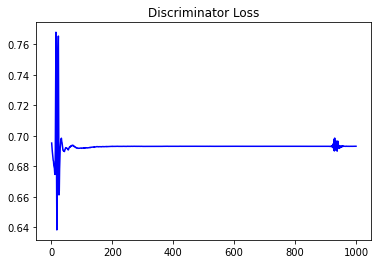

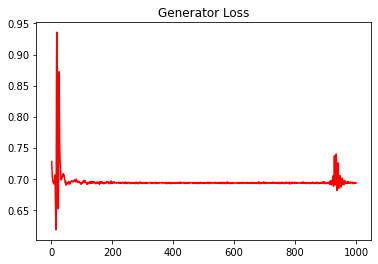

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11498384148156253


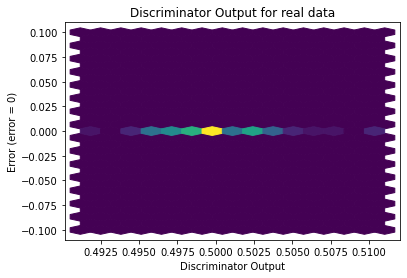

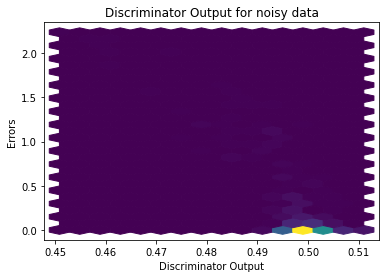

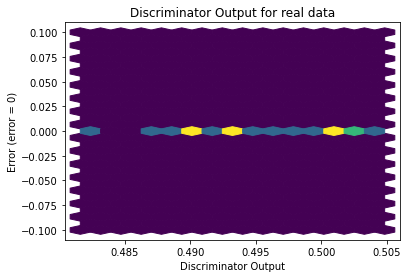

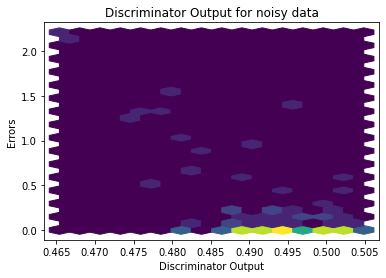

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


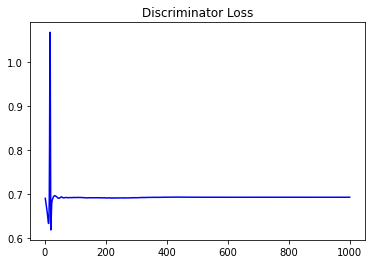

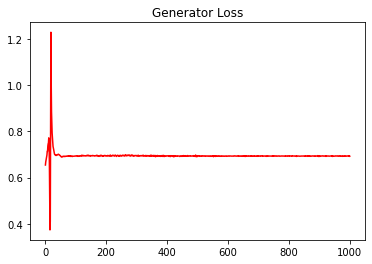

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1770190662251772


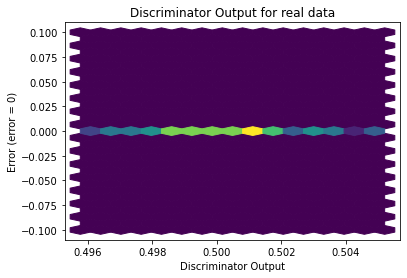

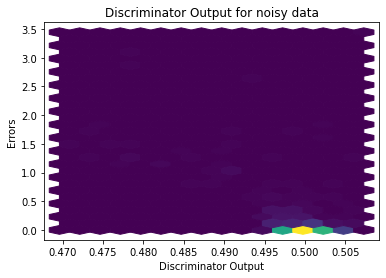

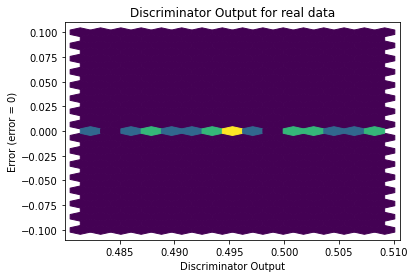

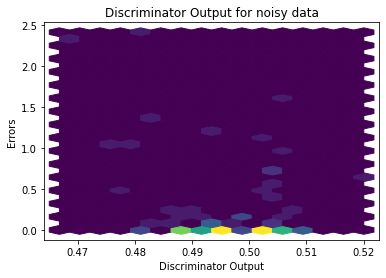

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0798]], requires_grad=True)
